# Importar librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explorar los datos

In [5]:
df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [10]:
df.shape

(1000, 8)

In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# Creando un histograma

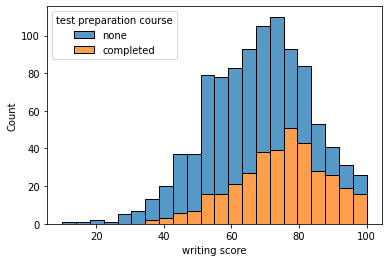

In [23]:
sns.histplot(data=df, x="writing score", hue="test preparation course", multiple="stack")

# Visualizacion de datos

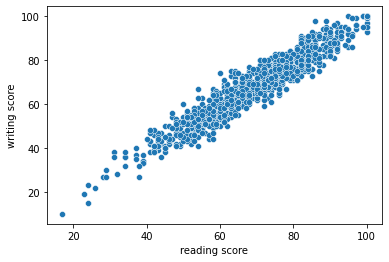

In [25]:
sns.scatterplot(data=df, x="reading score", y="writing score")

# Crear una tabla de frecuancias

In [34]:
freq = df["writing score"].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={"index": "Writing Score", "writing score": "Number of Students"})
df_freq

,Writing Score,Number of Students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


# Promedio de los puntajes

In [37]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

# Mediana de los puntajes

In [38]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

# Entrenar el modelo

X sera el puntaje de lectura y Y sera el punaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test de escritura

In [58]:
X = df["reading score"].values
Y = df["writing score"].values

# Convertir los datos a un tensor
X = X.reshape(-1, 1)

In [49]:
from sklearn.model_selection import train_test_split

In [59]:
# Dividir los datos en datos de entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [60]:
# Regrsion lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

print("La pendiente es: ", reg.coef_)
print("El bias es: ", reg.intercept_)
print("El coeficiente de regrsion es: ", reg.score(X_train, Y_train))

La pendiente es:  [0.99499242]
El bias es:  -0.7584047575851258
El coeficiente de regrsion es:  0.9124566219125431


# Visualizacion del modelo entrenado

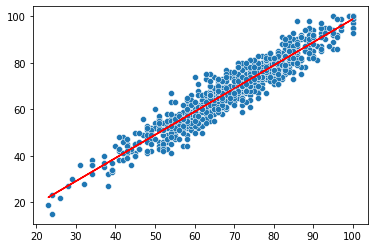

In [66]:
# Convertir los datos a un array
X_flat = X_train.flatten()

Y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
sns.scatterplot(x=X_flat, y=Y_train)
plt.plot(X_train, Y_hat, color="r")

# Evaluacion del modelo

In [70]:
from sklearn.metrics import mean_squared_error

Y_pred = reg.predict(X_test)

# Calcular le mean square error
print(mean_squared_error(Y_test, Y_pred))

21.118718254303694


In [74]:
value = pd.DataFrame({"Actual Test": Y_test.flatten(), "Predict": Y_pred.flatten()})
value

,Actual Test,Predict
0,68,59.936133
1,65,66.901080
2,86,82.820959
3,72,72.871034
4,58,51.976194
...,...,...
195,74,69.886057
196,45,48.991216
197,54,54.961171
198,59,61.926118
